In [1]:
import pandas as pd

In [2]:
%run spotipy.ipynb

# Datasets

## Tracks
https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?resource=download&select=tracks.csv

In [145]:
tracks = pd.read_csv('../data/tracks.csv')

In [146]:
tracks = tracks.dropna()

In [147]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586601 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586601 non-null  int64  
 3   duration_ms       586601 non-null  int64  
 4   explicit          586601 non-null  int64  
 5   artists           586601 non-null  object 
 6   id_artists        586601 non-null  object 
 7   release_date      586601 non-null  object 
 8   danceability      586601 non-null  float64
 9   energy            586601 non-null  float64
 10  key               586601 non-null  int64  
 11  loudness          586601 non-null  float64
 12  mode              586601 non-null  int64  
 13  speechiness       586601 non-null  float64
 14  acousticness      586601 non-null  float64
 15  instrumentalness  586601 non-null  float64
 16  liveness          58

## Charts
https://www.kaggle.com/datasets/jfreyberg/spotify-chart-data

In [148]:
charts = pd.read_csv('../data/charts.csv')

In [149]:
charts = charts.dropna()

In [150]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5427136 entries, 0 to 5428020
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   country        object
 2   position       int64 
 3   streams        int64 
 4   track_id       object
 5   artists        object
 6   artist_genres  object
 7   duration       int64 
 8   explicit       bool  
 9   name           object
dtypes: bool(1), int64(3), object(6)
memory usage: 419.2+ MB


## Artists

In [151]:
artists = pd.read_csv('../data/artists.csv')

In [ ]:
artists = artists.dropna()

In [ ]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104336 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104336 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104336 non-null  object 
 3   name        1104336 non-null  object 
 4   popularity  1104336 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 50.6+ MB


# Clusterização

In [ ]:
tracks.sort_values('popularity', ascending=False).head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4


In [ ]:
data_dropped = tracks.drop(columns=['id', 'name', 'artists', 'id_artists', 'release_date', 'popularity'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

norm_data = scaler.fit_transform(data_dropped.values)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

data_pca = PCA(n_components=3).fit_transform(norm_data)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters=60, n_init=4)
kmeans.fit(data_pca)
tracks['n_cluster'] = kmeans.labels_

In [ ]:
tracks.info()

NameError: name 'tracks' is not defined

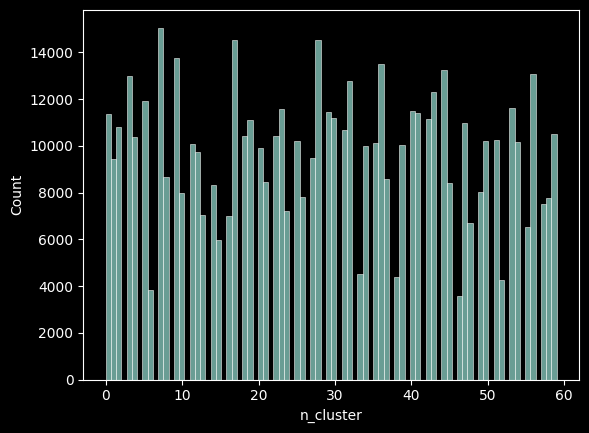

In [ ]:
import seaborn as sns

fig = sns.histplot(data=tracks, x="n_cluster")

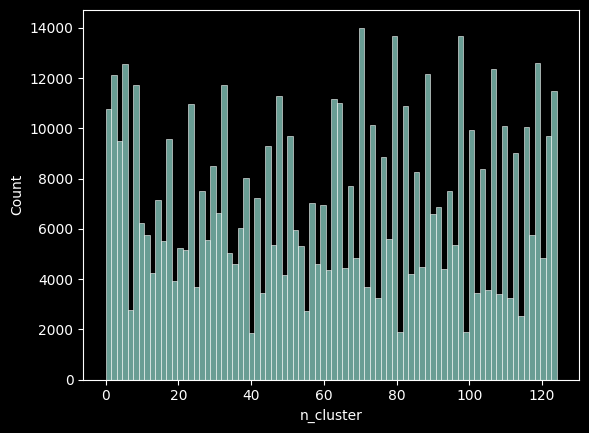

In [ ]:
import seaborn as sns

fig = sns.histplot(data=tracks, x="n_cluster")

# History

## Long History

In [164]:
from itertools import count

# Lendo todos os arquivos relacionados ao histórico de longo prazo

history_group = []

x = 1
while(x):
    try:
        history_group.append(pd.read_json('../data/StreamingHistory'+ str(x-1) +'.json'))
        x += 1
    except FileNotFoundError:
        break

long_history_df = pd.concat(history_group)

In [165]:
# Dropando músicas tocadas por menos de 30 segundos

long_history_df = (
    long_history_df[long_history_df['msPlayed']>=30000]
    .sort_values(by='endTime', ascending=True)
    .reset_index()
    .drop(columns=['index'])
    )

In [166]:
long_history_df['endTime'] = pd.to_datetime(long_history_df['endTime']).map(pd.Timestamp.timestamp)

In [167]:
long_history_df

,endTime,artistName,trackName,msPlayed
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,136964
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma",204773
2,1.655398e+09,Beach House,Space Song,320466
3,1.655398e+09,Journey,Separate Ways (Worlds Apart),323706
4,1.655399e+09,Konai,Perfume,61487
...,...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone,326933
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster,270213
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper,308120
20734,1.686786e+09,Mild High Club,Homage,177493


In [168]:
long_history_tracks_df = long_history_df[['endTime', 'artistName', 'trackName']].drop_duplicates()

In [169]:
long_history_tracks_df

,endTime,artistName,trackName
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma"
2,1.655398e+09,Beach House,Space Song
3,1.655398e+09,Journey,Separate Ways (Worlds Apart)
4,1.655399e+09,Konai,Perfume
...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper
20734,1.686786e+09,Mild High Club,Homage


In [170]:
# long_history_tracks_df['track_id'] = long_history_tracks_df.apply(lambda row: get_track_id(row['trackName'], row['artistName']), axis=1)
# long_history_tracks_df.to_csv('../data/track_ids_from_long_history.csv')

In [171]:
long_history_tracks_df = pd.read_csv('../data/track_ids_from_long_history.csv', index_col = 'Unnamed: 0')

In [172]:
long_history_tracks_df

,artistName,trackName,track_id
0,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,1nWyUagJmVzvBGTMDeY73L
1,The Strokes,"Call It Fate, Call It Karma",7G8hUONVhvJnkD3Ak8mNF1
2,Beach House,Space Song,1ujxjsoNvh4XgS2fUNwkZ2
3,Journey,Separate Ways (Worlds Apart),4ECNtOnqzxutZkXP4TE3n3
4,Konai,Perfume,4ZREaPhlA5mqZMFTSQBfzw
...,...,...,...
20707,Judas Priest,You've Got Another Thing Coming,2RaA6kIcvomt77qlIgGhCT
20724,Gonzaguinha,O Que É O Que É?,2CoKGyZavJWTFUPyvWoj0b
20728,Cage The Elephant,Black Madonna,7tCHpjktA50ihtkLz6bAnn
20734,Mild High Club,Homage,7DcJ6fEBb7BaKuYKTwiDxK


In [173]:
long_history_tracks_df[pd.isnull(long_history_tracks_df['track_id'])]

,artistName,trackName,track_id
45,The Pom-Poms,Full Circle,NaN
85,Men At Work,Down Under,NaN
95,Linkin Park,LOST IN THE ECHO,NaN
396,Games We Play,I Hope You’re Happy,NaN
457,Slipknot,(sic),NaN
...,...,...,...
20018,Louis Armstrong,What A Wonderful World,NaN
20138,Matt Maltese,As the World Caves In,NaN
20231,Англия,Ад из красных цветов,NaN
20233,Nürnberg,Los,NaN


In [174]:
long_history_df

,endTime,artistName,trackName,msPlayed
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,136964
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma",204773
2,1.655398e+09,Beach House,Space Song,320466
3,1.655398e+09,Journey,Separate Ways (Worlds Apart),323706
4,1.655399e+09,Konai,Perfume,61487
...,...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone,326933
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster,270213
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper,308120
20734,1.686786e+09,Mild High Club,Homage,177493


In [175]:
long_history_tracks_df

,artistName,trackName,track_id
0,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,1nWyUagJmVzvBGTMDeY73L
1,The Strokes,"Call It Fate, Call It Karma",7G8hUONVhvJnkD3Ak8mNF1
2,Beach House,Space Song,1ujxjsoNvh4XgS2fUNwkZ2
3,Journey,Separate Ways (Worlds Apart),4ECNtOnqzxutZkXP4TE3n3
4,Konai,Perfume,4ZREaPhlA5mqZMFTSQBfzw
...,...,...,...
20707,Judas Priest,You've Got Another Thing Coming,2RaA6kIcvomt77qlIgGhCT
20724,Gonzaguinha,O Que É O Que É?,2CoKGyZavJWTFUPyvWoj0b
20728,Cage The Elephant,Black Madonna,7tCHpjktA50ihtkLz6bAnn
20734,Mild High Club,Homage,7DcJ6fEBb7BaKuYKTwiDxK


In [176]:
long_history_tracks_ids_df = long_history_df[['endTime','artistName', 'trackName']].copy()

In [177]:
long_history_tracks_ids_df

,endTime,artistName,trackName
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma"
2,1.655398e+09,Beach House,Space Song
3,1.655398e+09,Journey,Separate Ways (Worlds Apart)
4,1.655399e+09,Konai,Perfume
...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper
20734,1.686786e+09,Mild High Club,Homage


In [178]:
long_history_tracks_ids_df = pd.merge(long_history_tracks_ids_df, long_history_tracks_df, how='left', on=['artistName', 'trackName'])

In [179]:
long_history_tracks_ids_df

,endTime,artistName,trackName,track_id
0,1.655331e+09,Fleetwood Mac,Rhiannon (Will You Ever Win) - 2018 Remaster,1nWyUagJmVzvBGTMDeY73L
1,1.655397e+09,The Strokes,"Call It Fate, Call It Karma",7G8hUONVhvJnkD3Ak8mNF1
2,1.655398e+09,Beach House,Space Song,1ujxjsoNvh4XgS2fUNwkZ2
3,1.655398e+09,Journey,Separate Ways (Worlds Apart),4ECNtOnqzxutZkXP4TE3n3
4,1.655399e+09,Konai,Perfume,4ZREaPhlA5mqZMFTSQBfzw
...,...,...,...,...
20731,1.686786e+09,Childish Gambino,Redbone,0WtDGnWL2KrMCk0mI1Gpwz
20732,1.686786e+09,Fleetwood Mac,The Chain - 2004 Remaster,5e9TFTbltYBg2xThimr0rU
20733,1.686786e+09,Blue Öyster Cult,(Don't Fear) The Reaper,5QTxFnGygVM4jFQiBovmRo
20734,1.686786e+09,Mild High Club,Homage,7DcJ6fEBb7BaKuYKTwiDxK


In [180]:
long_history_tracks_ids_df[pd.isnull(long_history_tracks_ids_df['track_id'])]

,endTime,artistName,trackName,track_id
45,1.655482e+09,The Pom-Poms,Full Circle,NaN
57,1.655504e+09,The Pom-Poms,Full Circle,NaN
85,1.655526e+09,Men At Work,Down Under,NaN
95,1.655528e+09,Linkin Park,LOST IN THE ECHO,NaN
396,1.655748e+09,Games We Play,I Hope You’re Happy,NaN
...,...,...,...,...
20558,1.686350e+09,Led Zeppelin,D'yer Mak'er - Remaster,NaN
20564,1.686351e+09,Alex G,Mary,NaN
20578,1.686528e+09,Men At Work,Down Under,NaN
20580,1.686528e+09,The Human League,Don't You Want Me,NaN


In [181]:
long_history_tracks_ids_df = long_history_tracks_ids_df[['endTime', 'track_id']]

In [182]:
long_history_tracks_ids_df = long_history_tracks_ids_df.dropna()

In [183]:
long_history_tracks_ids_df.reset_index(drop=True, inplace=True)

In [184]:
# long_history_tracks_ids_df['sequence_id'] = 1
# long_history_tracks_ids_df['event_id'] = long_history_tracks_ids_df.index + 1
# long_history_tracks_ids_df['itemset_size'] = 1

In [186]:
# long_history_tracks_ids_df = long_history_tracks_ids_df[['event_id', 'track_id']]

In [188]:
long_history_tracks_ids_df = long_history_tracks_ids_df['track_id']

In [196]:
from spmf import Spmf
input_list = long_history_tracks_ids_df.tolist()
input_txt = ' '.join(input_list)
spmf = Spmf("PrefixSpan", input_direct=input_txt, output_filename="output.txt", arguments=[1, 5])

PermissionError: [WinError 32] O arquivo já está sendo usado por outro processo: 'C:\\Users\\lecio\\AppData\\Local\\Temp\\tmpp5w7wse8' -> 'C:\\Users\\lecio\\AppData\\Local\\Temp\\tmpp5w7wse8.txt'

In [147]:
# import psutil

# ## Close open processes matching the path.
# pathToClear = 'C:\\Users\\lecio\\AppData\\Local\\Temp\\tmpd1xhy9fd'

# print(f"...Searching for active processes matching path: '{pathToClear}'")
# for proc in psutil.process_iter(['name', 'open_files']):
#     for file in proc.info['open_files'] or []:
#         if pathToClear in file.path:
#             print(f"Found process potentiall process potentially locking path. Killing: '{proc.info['name']}'")
#             print("%-5s %-10s %s" % (proc.pid, proc.info['name'][:10], file.path))
#             proc.kill()

# print("Completed!")

In [ ]:
# def get_track_id_sleep():

In [ ]:
test = long_history_tracks_df[long_history_tracks_df['trackName']]

In [ ]:
long_history_tracks_df[pd.isnull(long_history_tracks_df['track_id'])]

,artistName,trackName,track_id
45,The Pom-Poms,Full Circle,None
85,Men At Work,Down Under,None
95,Linkin Park,LOST IN THE ECHO,None
396,Games We Play,I Hope You’re Happy,None
457,Slipknot,(sic),None
...,...,...,...
20018,Louis Armstrong,What A Wonderful World,None
20138,Matt Maltese,As the World Caves In,None
20233,Nürnberg,Los,None
20242,Труд,Друг,None


In [ ]:
long_history_df

In [ ]:
long_history_tracks_transactions_df = long_history_df[['trackName', 'artistName']].copy()

In [ ]:
long_history_tracks_transactions_df = long_history_tracks_transactions_df.rename(columns={'trackName': 'Track1', 'artistName': 'Artist1'})
long_history_tracks_transactions_df[['Track2', 'Artist2']] = long_history_tracks_transactions_df[['Track1', 'Artist1']].shift(-1).ffill()
long_history_tracks_transactions_df[['Track3', 'Artist3']] = long_history_tracks_transactions_df[['Track2', 'Artist2']].shift(-1).ffill()
long_history_tracks_transactions_df[['Track4', 'Artist4']] = long_history_tracks_transactions_df[['Track3', 'Artist3']].shift(-1).ffill()
long_history_tracks_transactions_df[['Track5', 'Artist5']] = long_history_tracks_transactions_df[['Track4', 'Artist4']].shift(-1).ffill()

In [ ]:
TOTAL_OFFSETS = 4

long_history_tracks_transactions_df.drop(
    long_history_tracks_transactions_df.tail(TOTAL_OFFSETS).index,
    inplace = True
    )

In [ ]:
long_history_tracks_transactions_df

,Track1,Artist1,Track2,Artist2,Track3,Artist3,Track4,Artist4,Track5,Artist5
0,Rhiannon (Will You Ever Win) - 2018 Remaster,Fleetwood Mac,"Call It Fate, Call It Karma",The Strokes,Space Song,Beach House,Separate Ways (Worlds Apart),Journey,Perfume,Konai
1,"Call It Fate, Call It Karma",The Strokes,Space Song,Beach House,Separate Ways (Worlds Apart),Journey,Perfume,Konai,Тоска,Molchat Doma
2,Space Song,Beach House,Separate Ways (Worlds Apart),Journey,Perfume,Konai,Тоска,Molchat Doma,Copacabana,Jovem Dionisio
3,Separate Ways (Worlds Apart),Journey,Perfume,Konai,Тоска,Molchat Doma,Copacabana,Jovem Dionisio,Redbone,Childish Gambino
4,Perfume,Konai,Тоска,Molchat Doma,Copacabana,Jovem Dionisio,Redbone,Childish Gambino,Rhinestone Eyes,Gorillaz
...,...,...,...,...,...,...,...,...,...,...
20727,Mulheres,Martinho Da Vila,Black Madonna,Cage The Elephant,DARE,Gorillaz,Come A Little Closer,Cage The Elephant,Redbone,Childish Gambino
20728,Black Madonna,Cage The Elephant,DARE,Gorillaz,Come A Little Closer,Cage The Elephant,Redbone,Childish Gambino,The Chain - 2004 Remaster,Fleetwood Mac
20729,DARE,Gorillaz,Come A Little Closer,Cage The Elephant,Redbone,Childish Gambino,The Chain - 2004 Remaster,Fleetwood Mac,(Don't Fear) The Reaper,Blue Öyster Cult
20730,Come A Little Closer,Cage The Elephant,Redbone,Childish Gambino,The Chain - 2004 Remaster,Fleetwood Mac,(Don't Fear) The Reaper,Blue Öyster Cult,Homage,Mild High Club


In [ ]:
test

,artistName,trackName,track_id


In [ ]:
long_history_df.merge(long_history_tracks_df, on=['artistName', 'trackName'])

In [ ]:
long_history_df[long_history_df['trackName']=='Controllah (feat. MC Bin Laden)']

,index,endTime,artistName,trackName,msPlayed
14884,8371,2023-02-28 01:42,Gorillaz,Controllah (feat. MC Bin Laden),67280
14890,8378,2023-02-28 13:42,Gorillaz,Controllah (feat. MC Bin Laden),31493
14940,8431,2023-03-02 22:06,Gorillaz,Controllah (feat. MC Bin Laden),150317
14959,8457,2023-03-03 15:34,Gorillaz,Controllah (feat. MC Bin Laden),150316
14966,8464,2023-03-03 16:00,Gorillaz,Controllah (feat. MC Bin Laden),150316
15024,8553,2023-03-04 14:35,Gorillaz,Controllah (feat. MC Bin Laden),150316
15148,8694,2023-03-05 16:21,Gorillaz,Controllah (feat. MC Bin Laden),150317
15930,9726,2023-03-23 03:24,Gorillaz,Controllah (feat. MC Bin Laden),150316
16184,38,2023-03-28 14:17,Gorillaz,Controllah (feat. MC Bin Laden),150316
17142,1378,2023-04-14 18:33,Gorillaz,Controllah (feat. MC Bin Laden),150316


In [ ]:
long_history_transaction_df = 

## Recent History

In [ ]:
recent_history_df = get_current_user_recently_played()

In [ ]:
recent_history_df

## Saved Tracks

In [ ]:
saved_tracks_df = get_all_current_user_saved_tracks()
# gets ~86 tracks per second

In [ ]:
saved_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 37
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist Name  1188 non-null   object
 1   Artist ID    1188 non-null   object
 2   Track Name   1188 non-null   object
 3   Track ID     1188 non-null   object
dtypes: object(4)
memory usage: 46.4+ KB


## Currently Playing

In [ ]:
currently_playing_df = get_currently_playing()

In [ ]:
currently_playing_df

,Context Type,URI,Track Name,Track ID,Album Name,Album ID,Artist Names,Artist IDs
0,artist,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,Best Friends - Remix,6I5gj0D4OEScl48BPFR0J1,Dawn FM (Alternate World),12INlMsFtBjyehNnawBv36,"[The Weeknd, Summer Walker]","[1Xyo4u8uXC1ZmMpatF05PJ, 57LYzLEk2LcFghVwuWbcuS]"


# Algorithm

## Steps:

1. currently playing
2. selecting track scope
   1. songs from long history arules
   2. songs from the same artist that matches long history arules features (recommendation endpoint)
   3. songs from playlist that matches long history arules features
   4. songs from saved that matches long history arules features
   5. songs from similar artists that matches long history arules features
   6. removing recent history songs
3. evaluating tracks from last step accordingly to environment sentment analysis
   1. image emotion analysis (how the image affects humans) is an AI field barely developed
4. classificating tracks
   1. (modifier) prioritize context tracks (artist/album/playlist/saved) OR discovery tracks (new/long history)
      1. defining when to play a new song or a context song 
      2. when is context turn, modifier is positive for context and negative for discovery
      3. the oposite is true
   2. (some arules stat) + (similarity to best arules features) + (similarity to current playing features) + (emotion evaluation similarity)

## Context types:

- collection (saved)
  - get saved
- playlist (playlist, radio, mix)
  - get playlist
- none (searching tool)
  - get samples based purely on the current track
- artist (artist page)
  - get related artists and best tracks
- album

## Code

In [ ]:
currently_playing_df = get_currently_playing()


In [ ]:
currently_playing_df

,Context Type,URI,Track Name,Track ID,Album Name,Album ID,Artist Names,Artist IDs
0,album,spotify:album:2HTLCIs9enszF8Wj4fm3IP,All Screwed Up,2L9mbmlUUfSgXUK9gBAZcV,Brain Drain,2HTLCIs9enszF8Wj4fm3IP,[Ramones],[1co4F2pPNH8JjTutZkmgSm]
